## KÜTÜPHANELER

In [7]:
!pip install evds

In [8]:
import evds
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

## LOAD DATASET - EVDS

In [10]:
data=evds.evdsAPI(key="my_api_key")

In [13]:
data.main_categories

,CATEGORY_ID,TOPIC_TITLE_TR
0,1,PİYASA VERİLERİ
1,2,KURLAR
2,3,FAİZ İSTATİSTİKLERİ
3,4,PARA VE BANKA İSTATİSTİKLERİ
4,5,MENKUL KIYMET İSTATİSTİKLERİ
5,12,FİNANSAL İSTATİSTİKLER
6,13,TCMB BİLANÇO VERİLERİ
7,14,FİYAT ENDEKSLERİ
8,15,ANKETLER
9,18,"ÖDEMELER DENGESİ, ULUSLARARASI YATIRIM POZİSYONU"


In [15]:
data.get_sub_categories(21)

,CATEGORY_ID,DATAGROUP_CODE,DATAGROUP_NAME
0,21,bie_cli2,Bileşik Öncü Göstergeler Endeksi(MBÖNCÜ-SÜE)
1,21,bie_gsyhgycf,GSYİH-Gelir Yöntemiyle-Cari Fiyatlarla (TÜIK)(...
2,21,bie_gsyhhycf,GSYİH-Harcama Yöntemiyle-Cari Fiyatlarla (TÜIK...
3,21,bie_gsyhhyhe,GSYİH-Harcama Yöntemiyle-Zincirlenmiş Hacim (T...
4,21,bie_gsyhifkcf,GSYİH-İktisadi Faaliyet Kollarına (A10) Göre-C...
5,21,bie_gsyhifkhe,GSYİH-İktisadi Faaliyet Kollarına (A10) Göre-Z...
6,21,bie_kko2,İmalat Sanayi Kapasite Kullanım Oranı (%) (NAC...
7,21,bie_kkoisma,İmalat Sanayi Kapasite Kullanım Oranı-Mevsimse...
8,21,bie_uroto,Toplam Otomobil Üretimi (OSD)
9,21,bie_ackap2,Şirket İstatistikleri-Açılan-Kapanan (TOBB)


In [21]:
data.get_series("bie_elektuketim")

,SERIE_CODE,SERIE_NAME,START_DATE
0,TP.ELEKTUKETIM.URT,Üretim(Günlük)(MWh),01-01-2016
1,TP.ELEKTUKETIM.IHR,İhracat(Günlük)(MWh),01-01-2016
2,TP.ELEKTUKETIM.ITH,İthalat(Günlük)(MWh),01-01-2016
3,TP.ELEKTUKETIM.TKT1,Tüketim(Günlük)(MWh),01-01-2016


In [26]:
df=data.get_data(["TP.GSYIH26.HY.ZH"],startdate="1-1-1998",enddate="1-1-2023")

## KEŞİFÇİ VERİ ANALİZİ

In [27]:
df.head()

,Tarih,TP_GSYIH26_HY_ZH
0,1998-Q1,1.581245e+08
1,1998-Q2,1.721125e+08
2,1998-Q3,1.953092e+08
3,1998-Q4,1.852111e+08
4,1999-Q1,1.486788e+08


In [28]:
df.isnull().sum()

Tarih               0
TP_GSYIH26_HY_ZH    0
dtype: int64

In [29]:
df.shape

(101, 2)

In [33]:
df["Tarih"]=pd.date_range("1998-01-01",periods=len(df),freq="Q")
df.rename(columns={"TP_GSYIH26_HY_ZH":"GSYH"},inplace=True)
df.set_index("Tarih",inplace=True)
df.head()

,GSYH
Tarih,
1998-03-31,1.581245e+08
1998-06-30,1.721125e+08
1998-09-30,1.953092e+08
1998-12-31,1.852111e+08
1999-03-31,1.486788e+08


In [42]:
df.tail()

,GSYH
Tarih,
2022-03-31,4.701431e+08
2022-06-30,5.071277e+08
2022-09-30,5.631055e+08
2022-12-31,5.816904e+08
2023-03-31,4.886994e+08


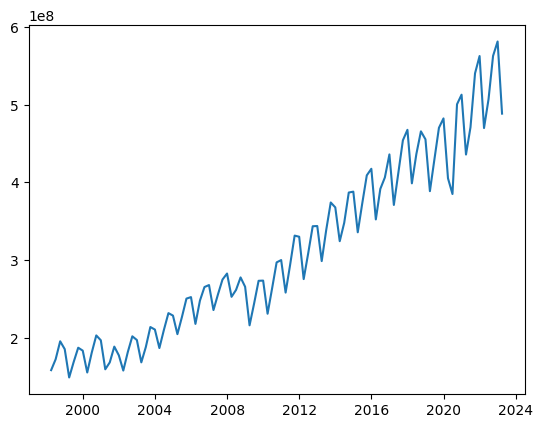

In [34]:
plt.plot(df)

**veride trend ve mevsimsellik var.**

## MODEL - TES

**SES = durağanlık \
DES = durağanlık + trend \
TES = durağanlık + trend + mevsimsellik \
bu modeller, çok basit zaman serilerinde kullanılır. Durağanlık içermeyen zaman serilerinde gerçekçi tahminler yapamazlar.**

In [35]:
tes=ExponentialSmoothing(df["GSYH"],trend="add",seasonal="add",seasonal_periods=4)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


**periyod sayısı verisetindeki çeyrekliklere göre belirledik. bir yıl içerisinde 4 çeyreklik var.**

In [37]:
model=tes.fit(smoothing_level=0.5,smoothing_slope=0.5,smoothing_seasonal=0.5)

<ipython-input-37-b07f516db1dd>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model=tes.fit(smoothing_level=0.5,smoothing_slope=0.5,smoothing_seasonal=0.5)


**TES parametrelerini [0-1] aralığında bir değer ile belirledik. --> durağanlık, trend, mevsimsellik.**

## TAHMİN

In [43]:
tahmin=model.forecast(24) # verisetinden sonraki 24 periyodu tahmin et
tahmin.head()

2023-06-30    5.156458e+08
2023-09-30    5.736204e+08
2023-12-31    5.939878e+08
2024-03-31    5.027707e+08
2024-06-30    5.285345e+08
Freq: Q-DEC, dtype: float64

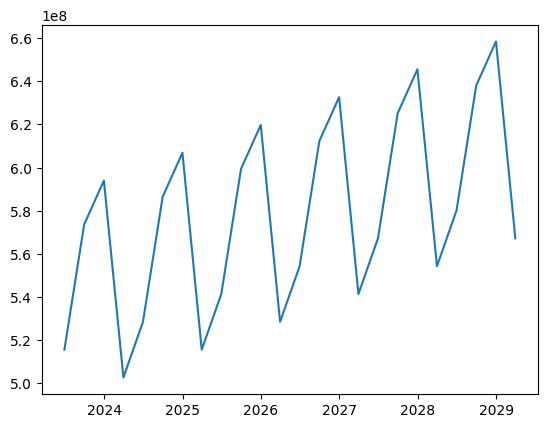

In [41]:
plt.plot(tahmin)

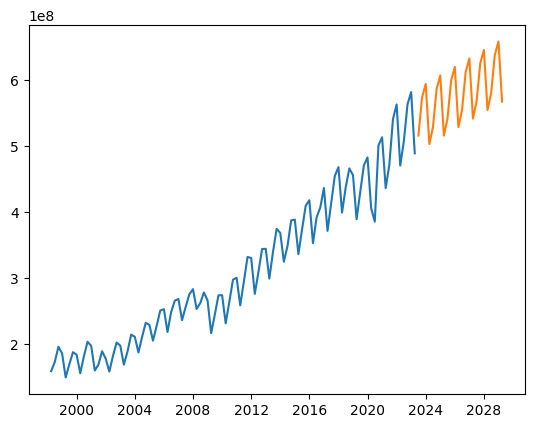

In [45]:
plt.plot(df)
plt.plot(tahmin)